# 13 Matplotlib - Format Charts

Now that we have e.g. graphed the top skills for one job titles, how do we plot multiple graphs one to another to do a comparison? 

Let's look at the [cheat sheet](https://matplotlib.org/cheatsheets/) for more info.

We could do it in, as detailed in the subplot section: specific the number of "rows" and "columns" of plots!

In [2]:
# Import libraries

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\erard\Anaconda3\envs\Luke_Barousse_Python_Course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 13.1 Simple example

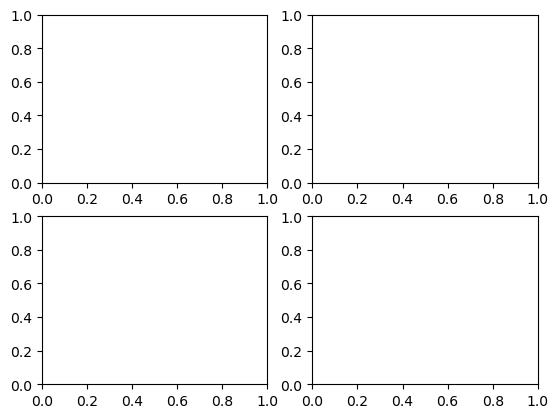

In [3]:
# this is how a subplot looks like - you can decide how many plots you want!
# "fig, ax" is the typical nomenclature for this
fig, ax = plt.subplots(2, 2)

<Axes: xlabel='job_schedule_type'>

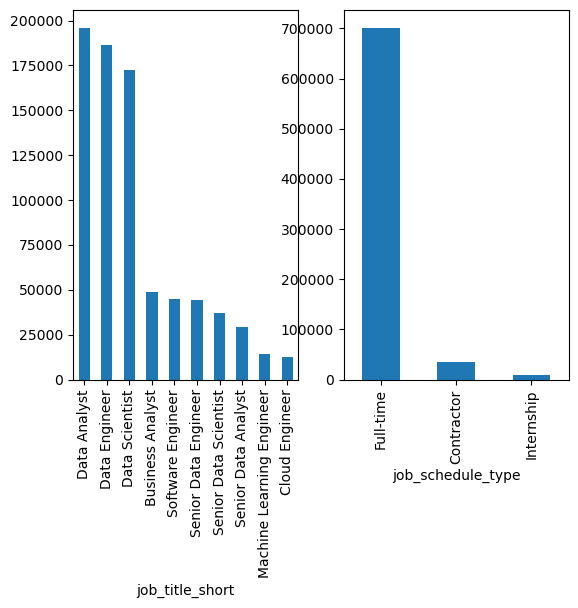

In [4]:
# let's keep it simple for now with only 2 plots
# 1 - count of job_title_short and 2 - count of job_schedule_type

fig, ax = plt.subplots(1, 2)

df["job_title_short"].value_counts().plot(kind="bar", ax=ax[0]) # similar to a list, we need to define the "index" of the plot in between square brackets, starting with 0

df["job_schedule_type"].value_counts().head(3).plot(kind="bar", ax=ax[1]) # here it is 1. Trading numbers would trade places in the suboplots

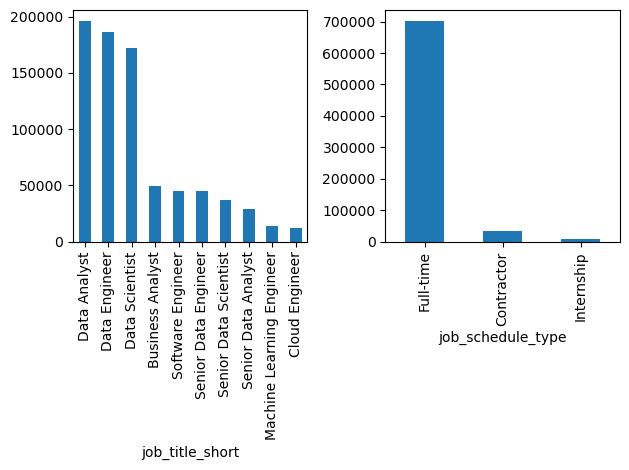

In [5]:
# we can remove the overlap of the axis
# we use the tight method

fig, ax = plt.subplots(1, 2)

df["job_title_short"].value_counts().plot(kind="bar", ax=ax[0])

df["job_schedule_type"].value_counts().head(3).plot(kind="bar", ax=ax[1])

plt.tight_layout()

## 13.2 Example to plot the various top skills per job title

In [6]:
# let's first recreate a df that allows us to count all the occurrences of each skill type

df_skills = df.copy()
df_skills = df_skills.explode("job_skills")
skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()
df_skills_count = skills_count.reset_index(name="skill_count")
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


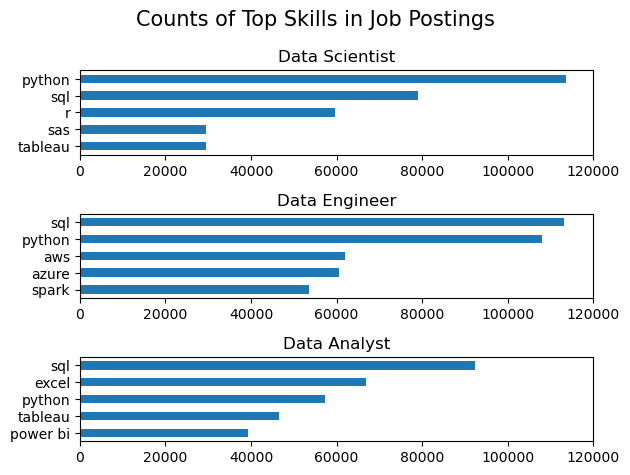

In [7]:
# we want to look at 3 roles specifically - data scientist, data engineer, data analyst
# we need to use a list because we will loop through each job title and then plot individually on our figure.

job_titles = ["Data Scientist", "Data Engineer", "Data Analyst"]

fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):  # for every index i and job_title in the list job_titles
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5) #filter the df_skills_count df based on the job_title_short column and return the top 5 skills only
    df_plot.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    ax[i].invert_yaxis() # to have the top count at the top of each graph
    ax[i].set_ylabel("") # remove the y label title on the left
    ax[i].legend().set_visible(False) # remove the legend in each graph
    ax[i].set_xlim(0, 120000) # align the x axis across all graphs

fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15) # add a plot title
fig.tight_layout() #make sure it's at the end to include all above elements to then do the tight layout.

# 13 Problems

## 2.13.1

Create a subplot with 2 rows and 1 column:

- In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
- In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
- Use tight_layout() to adjust the spacing between subplots.

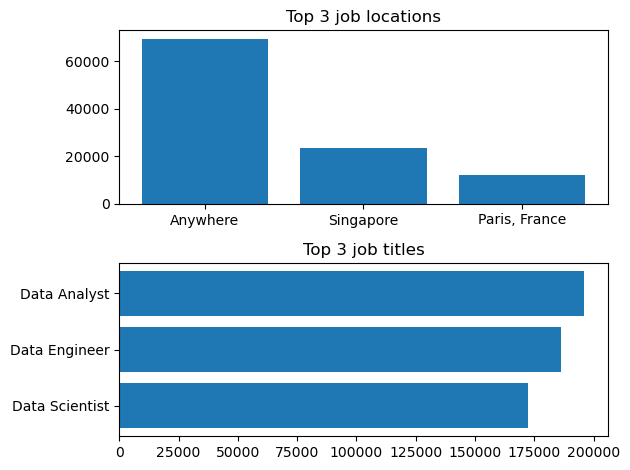

In [13]:
# copying df 

df_problem1 = df.copy()

# creating subplot

fig, ax = plt.subplots(2, 1)

# top 3 locations

job_locations = df_problem1["job_location"].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title("Top 3 job locations")

# top 3 job title
job_titles = df_problem1["job_title_short"].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title("Top 3 job titles")
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

## 2.13.2

Create a subplot with 2 rows and 2 columns:

- In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
- Use fig.tight_layout() to adjust the spacing between subplots.

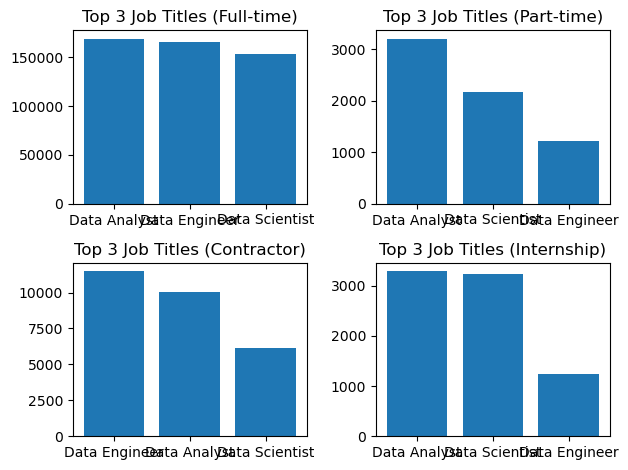

In [36]:
fig, ax = plt.subplots(2, 2)

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()

## 2.13.3

Create a subplot with 3 rows and 1 column:

- In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
- Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.

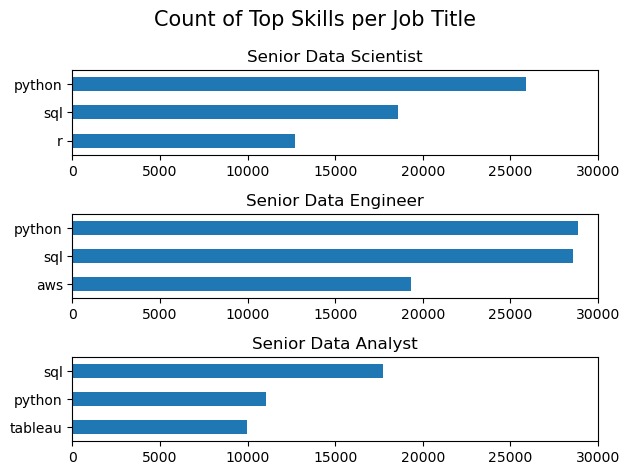

In [ ]:
# copy df

df_problem3 = df.copy()

# create a df listing all skills per job_title_short

df_problem3_exploded = df_problem3.explode("job_skills")
skills_count_problem3 = df_problem3_exploded.groupby(["job_skills", "job_title_short"]).size()
df_skills_count_problem3 = skills_count_problem3.reset_index(name="skill_count_problem3")
df_skills_count_problem3.sort_values(by="skill_count_problem3", ascending=False, inplace=True)

# create a list for the positions we're looking for

job_titles_problem3 = ["Senior Data Scientist", "Senior Data Engineer", "Senior Data Analyst"]

# plot for every job_title in job_titles_problem3

fig, ax = plt.subplots (3, 1)

for i, job_title_problem3 in enumerate(job_titles_problem3):
    df_plot_problem3 = df_skills_count_problem3[df_skills_count_problem3["job_title_short"] == job_title_problem3].head(3)
    df_plot_problem3.plot(kind="barh", x="job_skills", y="skill_count_problem3", ax=ax[i], title=job_title_problem3)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,30000)

fig.suptitle("Count of Top Skills per Job Title", fontsize=15)
fig.tight_layout()
plt.show()